### EDA Projeto Inteligência Artificial
- Aluno: Gustavo Carvalho; 
- RA: 10175838

In [47]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv('Dataset Fraude.csv')

In [48]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [49]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [50]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [51]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [52]:
columns_to_drop = ['nameOrig', 'nameDest']
df.drop(columns=columns_to_drop, inplace=True)

cat_features = ['type']
num_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

target = 'isFraud'
print("Valores ausentes antes do tratamento:", df.isnull().sum())
df.dropna(subset=num_features + cat_features + [target], inplace=True)

encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])

scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(df[num_features])

df_processed = pd.concat([pd.DataFrame(numeric_scaled, columns=num_features), 
                          df[cat_features + [target]].reset_index(drop=True)], axis=1)

Valores ausentes antes do tratamento: step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


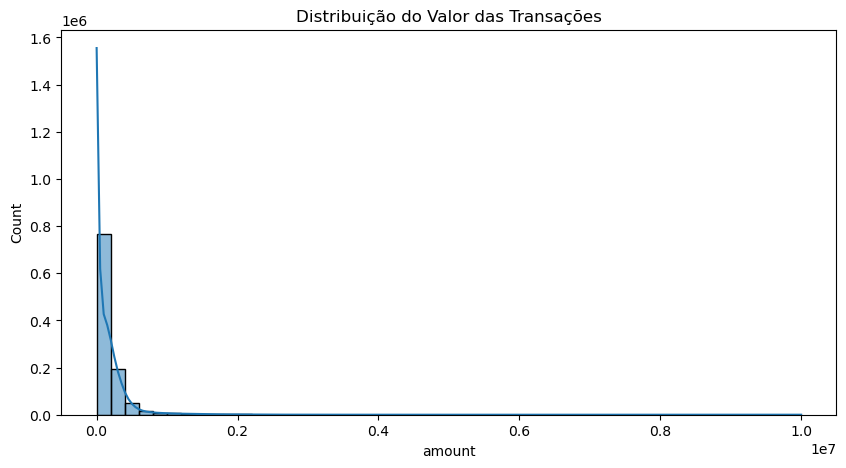

In [53]:
df.drop_duplicates(inplace=True)
plt.figure(figsize=(10, 5))
sns.histplot(df["amount"], bins=50, kde=True)
plt.title("Distribuição do Valor das Transações")
plt.show()

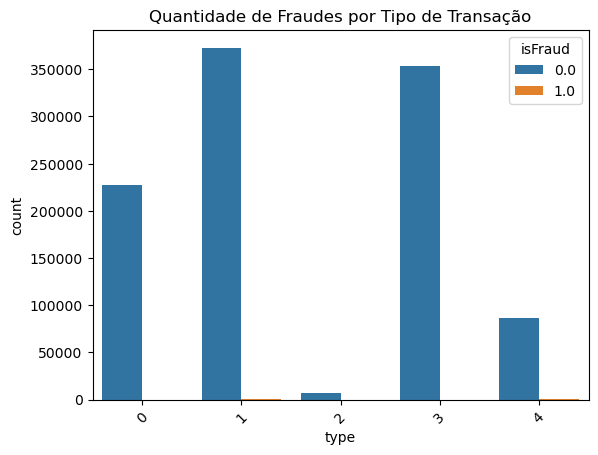

In [54]:
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Quantidade de Fraudes por Tipo de Transação")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Correlação entre Variáveis')

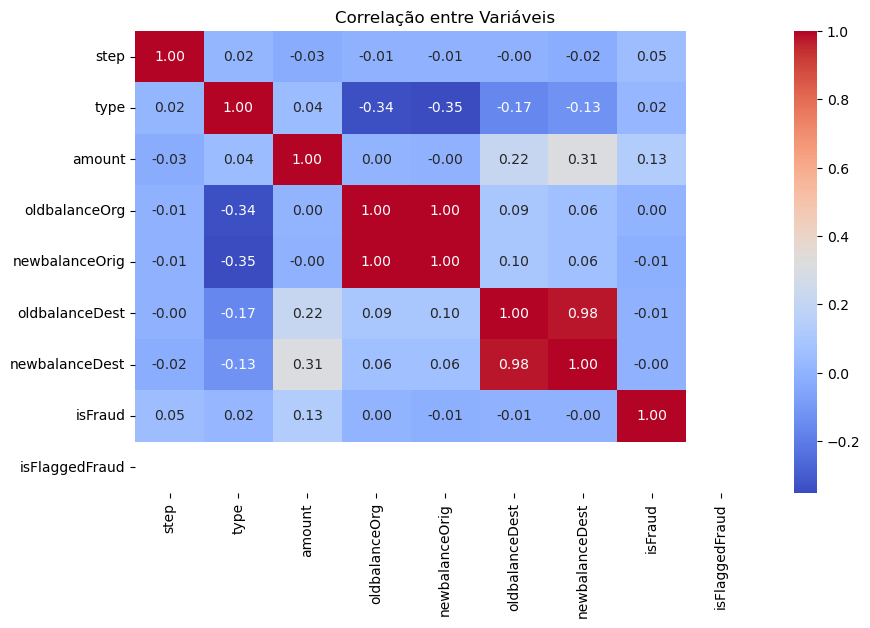

In [55]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")

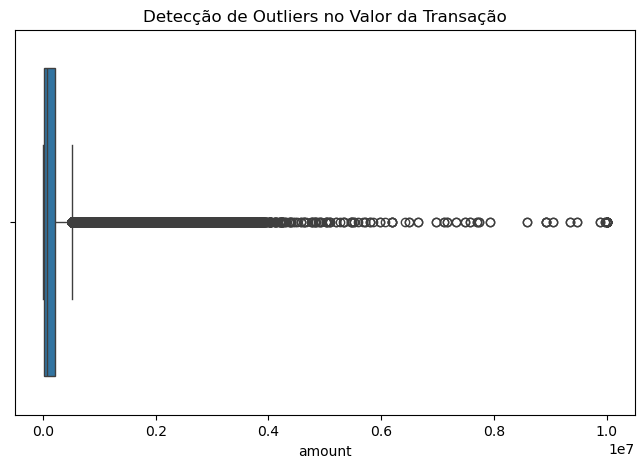

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["amount"])
plt.title("Detecção de Outliers no Valor da Transação")
plt.show()